In [1]:
%run ../preset.py

In [2]:
df = pd.read_parquet(f"../" + prep_data_url)

In [3]:
df.tail(3)

,subject_name,actual_consumption,datetime
index,,,
2024-07-17 00:00:00,Чувашская Республика - Чувашия,486.0,2024-07-17 00:00:00
2024-07-17 00:00:00,Южно-Якутский энергорайон,358.0,2024-07-17 00:00:00
2024-07-17 00:00:00,Ярославская область,766.0,2024-07-17 00:00:00


In [4]:
df["datetime"] = df["datetime"].astype("datetime64[ns]")

In [5]:
df.head(3)

,subject_name,actual_consumption,datetime
index,,,
2011-01-01 00:00:00,Алтайский край,1313.0,2011-01-01
2011-01-01 00:00:00,Амурская область,870.0,2011-01-01
2011-01-01 00:00:00,Архангельская область,970.0,2011-01-01


In [6]:
df["dummie step"] = range(df.shape[0])

In [7]:
df.head(3)

,subject_name,actual_consumption,datetime,dummie step
index,,,,
2011-01-01 00:00:00,Алтайский край,1313.0,2011-01-01,0
2011-01-01 00:00:00,Амурская область,870.0,2011-01-01,1
2011-01-01 00:00:00,Архангельская область,970.0,2011-01-01,2


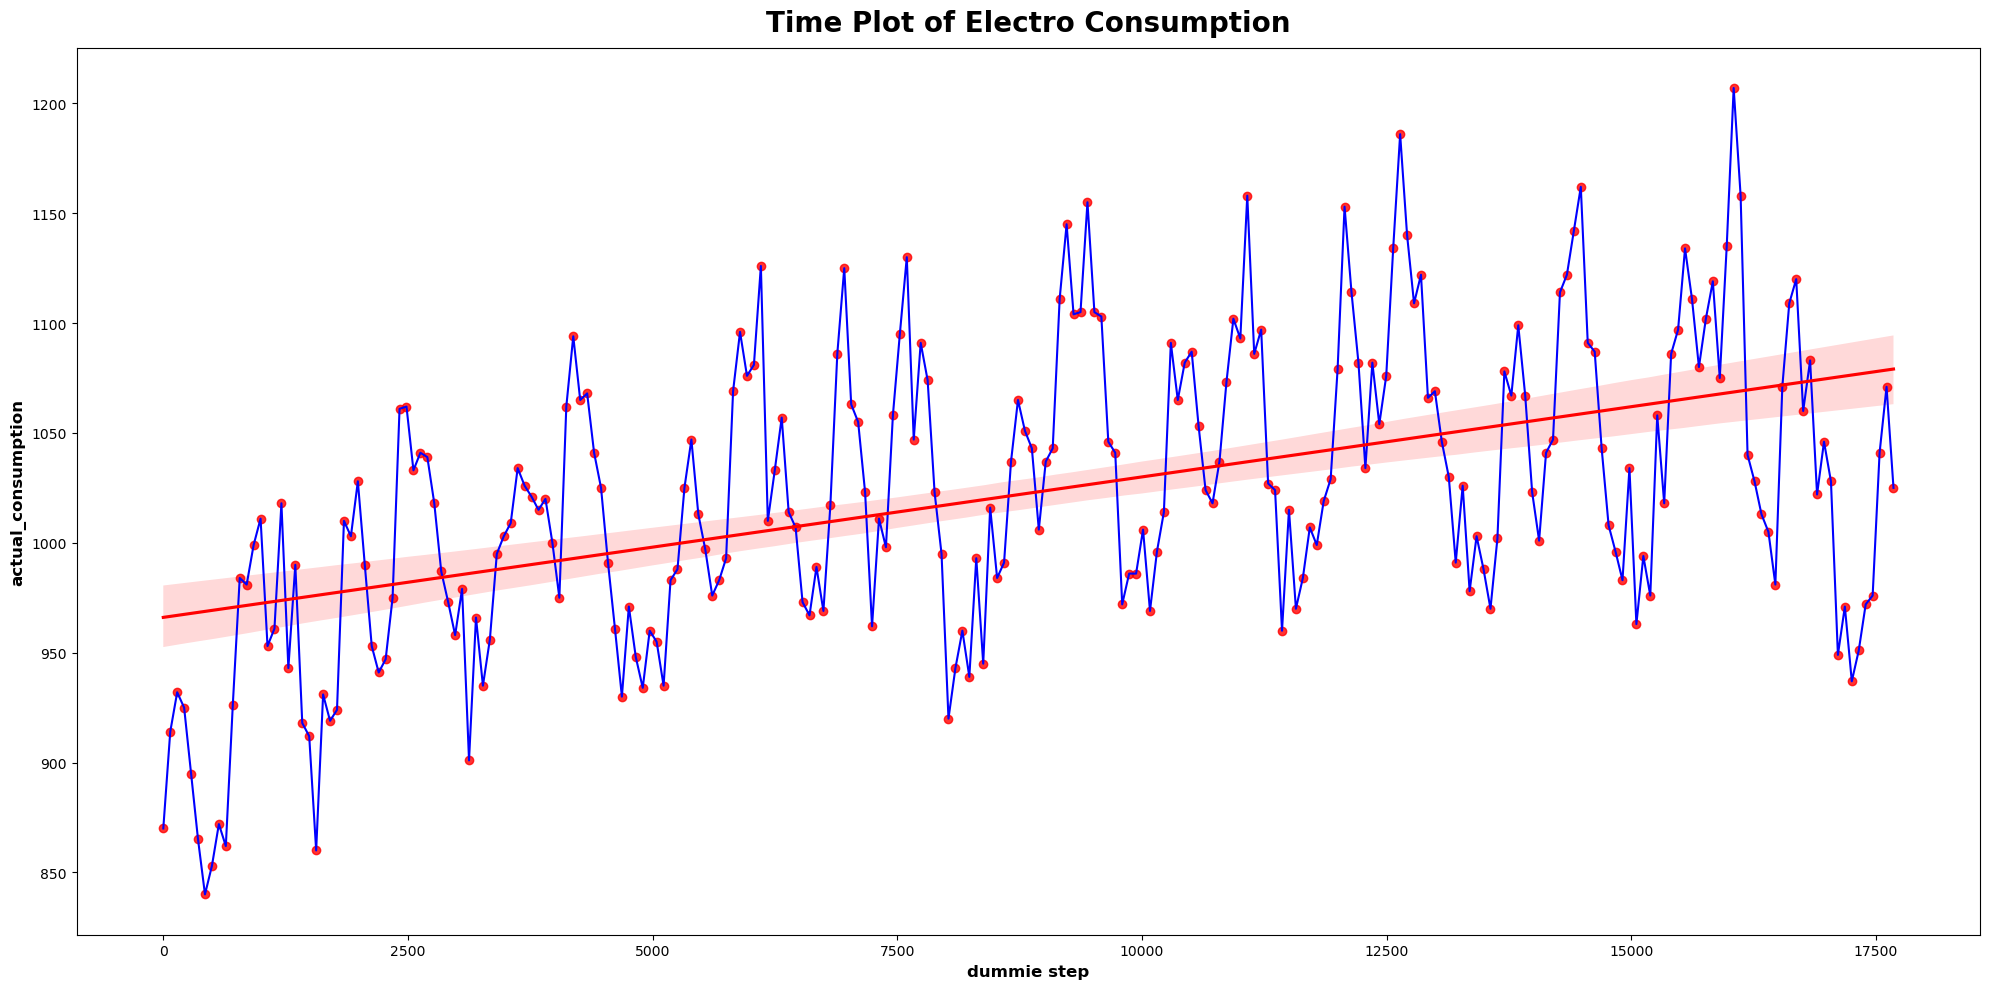

In [8]:
plt.rc(
       "figure",
        autolayout=True,
        figsize=(20, 10),
        titlesize=16,
        titleweight="bold",
      )

plt.rc(
       "axes",
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=20,
       titlepad=12,
      )

fig, ax = plt.subplots();

ax.plot(
        "dummie step",
        "actual_consumption",
        data=df[df["subject_name"] == "Амурская область"][:250],
        color='blue'
       );

ax = sns.regplot(
                 x="dummie step",
                 y="actual_consumption",
                 color="red",
                 data=df[df["subject_name"] == "Амурская область"][:250]
                );

ax.set_title("Time Plot of Electro Consumption");

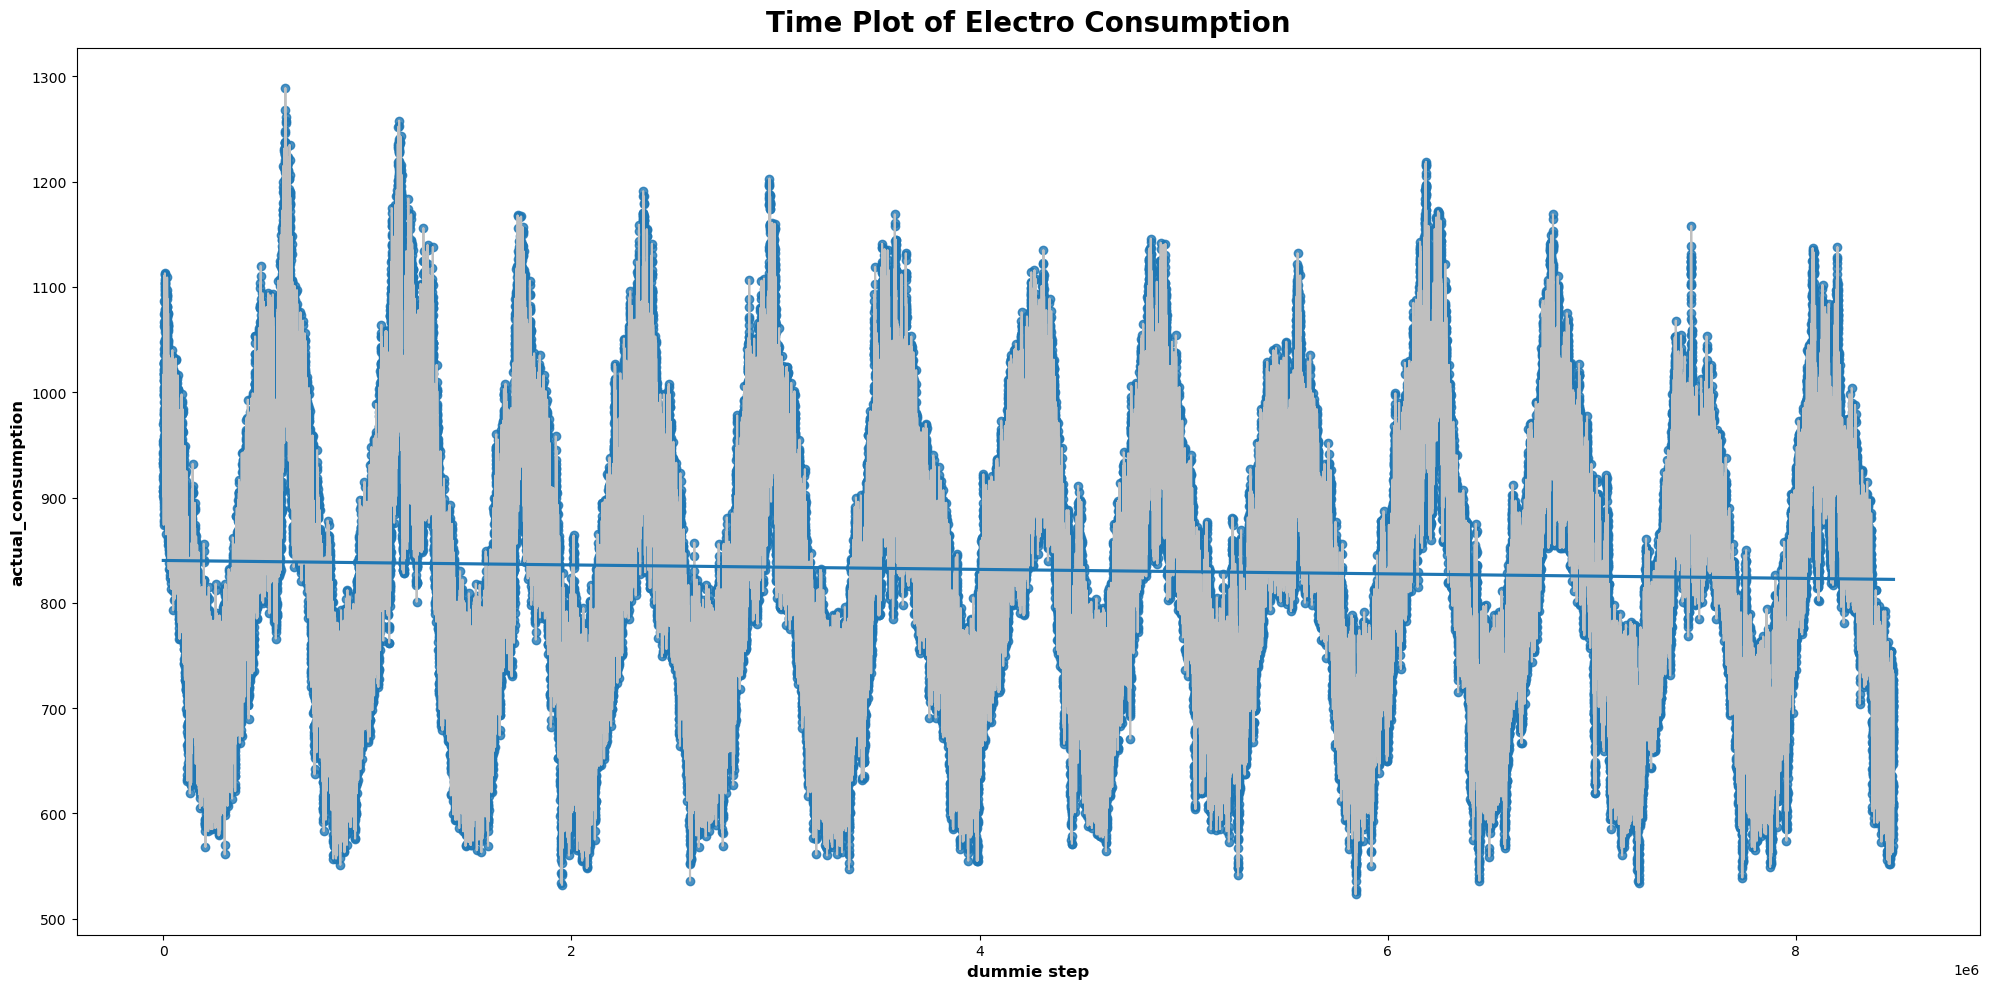

In [9]:
plt.rc(
       "figure",
        autolayout=True,
        figsize=(20, 10),
        titlesize=16,
        titleweight="bold",
      )

plt.rc(
       "axes",
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=20,
       titlepad=12,
      )

fig, ax = plt.subplots();

ax.plot(
        "dummie step",
        "actual_consumption",
        data=df[df["subject_name"] == "Архангельская область"],
        color='0.75'
       );

ax = sns.regplot(
                 x="dummie step",
                 y="actual_consumption",
                 data=df[df["subject_name"] == "Архангельская область"]
                );

ax.set_title("Time Plot of Electro Consumption");

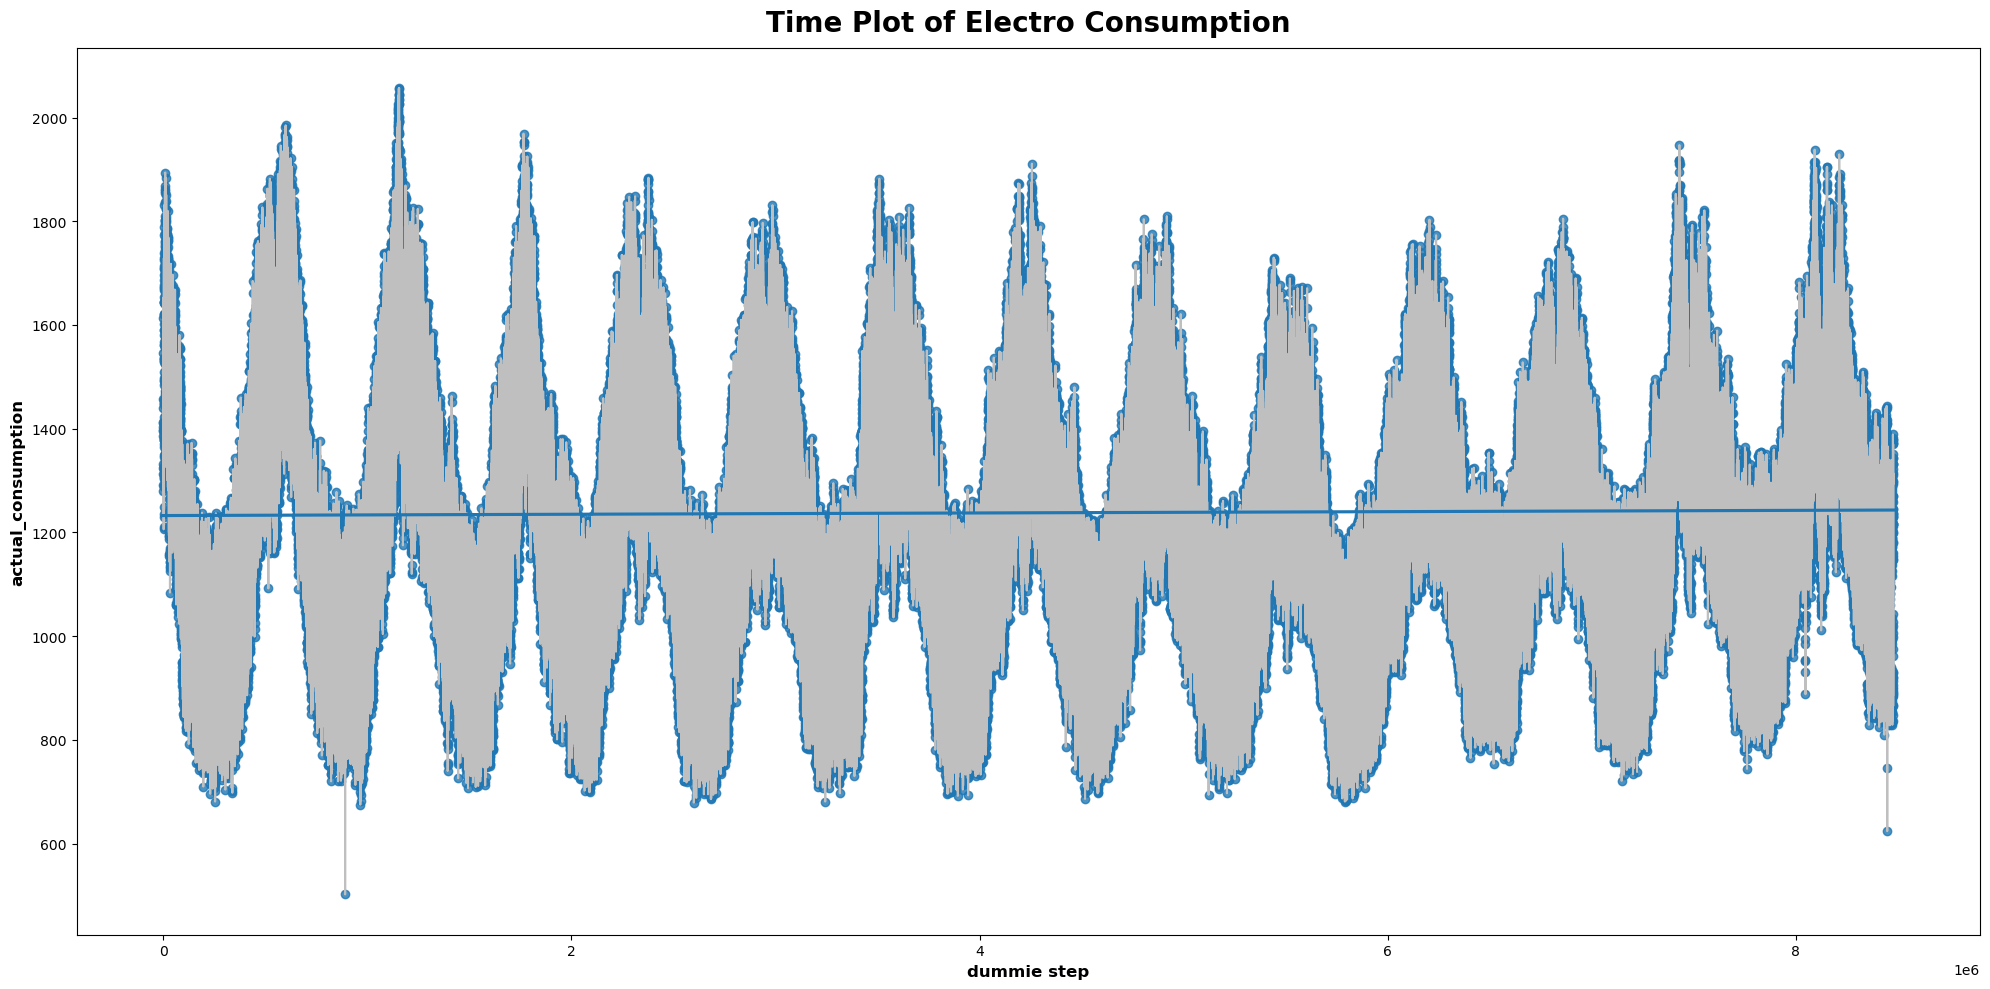

In [10]:
plt.rc(
       "figure",
        autolayout=True,
        figsize=(20, 10),
        titlesize=16,
        titleweight="bold",
      )

plt.rc(
       "axes",
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=20,
       titlepad=12,
      )

fig, ax = plt.subplots();

ax.plot(
        "dummie step",
        "actual_consumption",
        data=df[df["subject_name"] == "Алтайский край"],
        color='0.75'
       );

ax = sns.regplot(
                 x="dummie step",
                 y="actual_consumption",
                 data=df[df["subject_name"] == "Алтайский край"]
                );

ax.set_title("Time Plot of Electro Consumption");

In [11]:
df["subject_name"].value_counts()

Республика Хакасия                115806
Республика Марий Эл               115806
Самарская область                 115806
Чувашская Республика - Чувашия    115806
Пензенская область                115806
                                   ...  
Еврейская автономная область      112129
Республика Мордовия                99054
Республика Крым                    65964
Западный энергорайон Якутии        47728
Центральный энергорайон Якутии     47728
Name: subject_name, Length: 75, dtype: int64

In [12]:
tmp = pd.DataFrame()


for categ in df["subject_name"].unique():
    zxc = df[df["subject_name"] == categ].copy()
    zxc["actual_consumption"] = zxc["actual_consumption"].shift(24)
    
    tmp = tmp.append(zxc.copy())



In [13]:
tmp.sort_values(by=["datetime", "subject_name"], inplace=True)

In [14]:
df.head()

,subject_name,actual_consumption,datetime,dummie step
index,,,,
2011-01-01 00:00:00,Алтайский край,1313.0,2011-01-01,0
2011-01-01 00:00:00,Амурская область,870.0,2011-01-01,1
2011-01-01 00:00:00,Архангельская область,970.0,2011-01-01,2
2011-01-01 00:00:00,Астраханская область,504.0,2011-01-01,3
2011-01-01 00:00:00,Белгородская область,1592.0,2011-01-01,4


In [15]:
df["day_lag"] = tmp["actual_consumption"]

In [16]:
df.head()

,subject_name,actual_consumption,datetime,dummie step,day_lag
index,,,,,
2011-01-01 00:00:00,Алтайский край,1313.0,2011-01-01,0,NaN
2011-01-01 00:00:00,Амурская область,870.0,2011-01-01,1,NaN
2011-01-01 00:00:00,Архангельская область,970.0,2011-01-01,2,NaN
2011-01-01 00:00:00,Астраханская область,504.0,2011-01-01,3,NaN
2011-01-01 00:00:00,Белгородская область,1592.0,2011-01-01,4,NaN


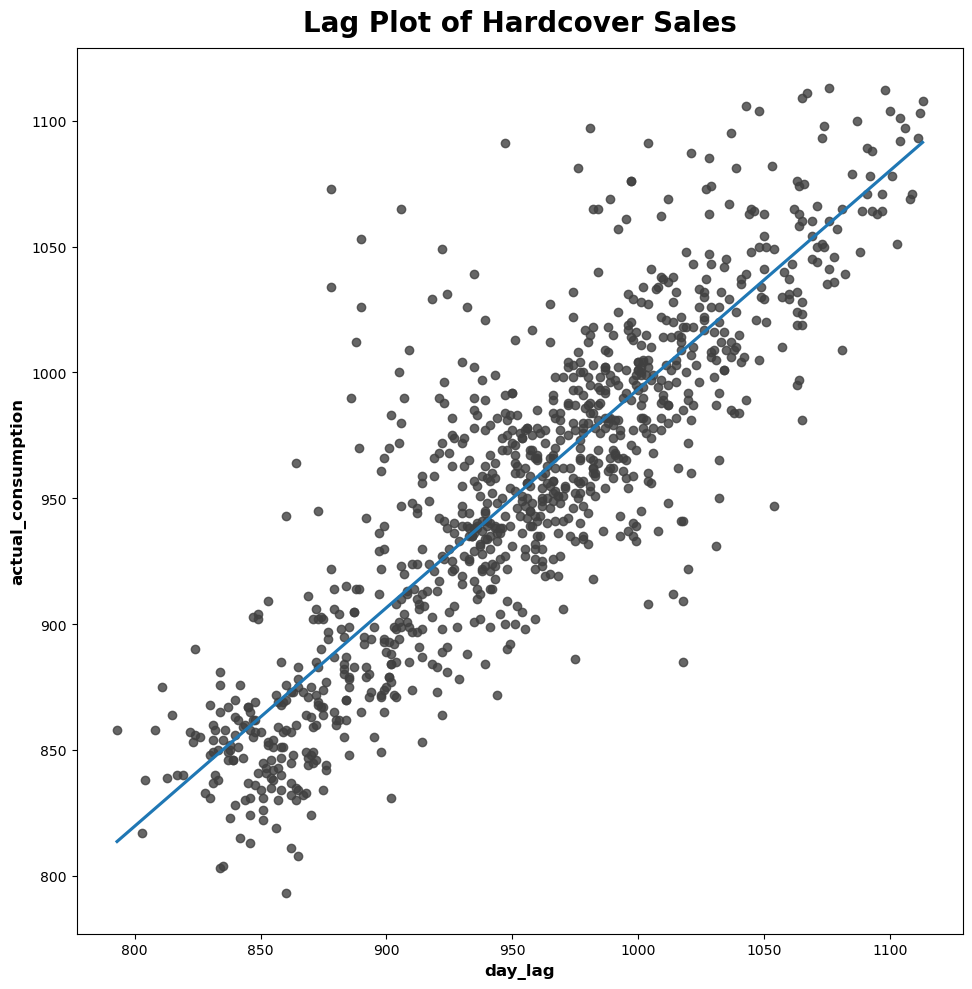

In [17]:
fig, ax = plt.subplots()
ax = sns.regplot(
                 x='day_lag',
                 y='actual_consumption',
                 data=df[df["subject_name"] == "Архангельская область"][:1000],
                 ci=None,
                 scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales');

In [18]:
df.head(3)

,subject_name,actual_consumption,datetime,dummie step,day_lag
index,,,,,
2011-01-01 00:00:00,Алтайский край,1313.0,2011-01-01,0,NaN
2011-01-01 00:00:00,Амурская область,870.0,2011-01-01,1,NaN
2011-01-01 00:00:00,Архангельская область,970.0,2011-01-01,2,NaN


In [19]:
zummi = pd.get_dummies(df["subject_name"])

In [20]:
df.drop(columns=["subject_name"], inplace=True)

In [21]:
df = pd.concat([df, zummi], axis=1)

In [22]:
df.head()

,actual_consumption,datetime,dummie step,day_lag,Алтайский край,Амурская область,Архангельская область,Астраханская область,Белгородская область,Брянская область,...,Тульская область,Тюменская область,Удмуртская Республика,Ульяновская область,Центральный энергорайон Якутии,Челябинская область,Чеченская Республика,Чувашская Республика - Чувашия,Южно-Якутский энергорайон,Ярославская область
index,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1313.0,2011-01-01,0,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 00:00:00,870.0,2011-01-01,1,NaN,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 00:00:00,970.0,2011-01-01,2,NaN,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 00:00:00,504.0,2011-01-01,3,NaN,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 00:00:00,1592.0,2011-01-01,4,NaN,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
naz = list(df.columns)

In [24]:
naz

['actual_consumption',
 'datetime',
 'dummie step',
 'day_lag',
 'Алтайский край',
 'Амурская область',
 'Архангельская область',
 'Астраханская область',
 'Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Волгоградская область',
 'Вологодская область',
 'Воронежская область',
 'Еврейская автономная область',
 'Забайкальский край',
 'Западный энергорайон Якутии',
 'Ивановская область',
 'Иркутская область',
 'Кабардино-Балкарская Республика',
 'Калининградская область',
 'Калужская область',
 'Карачаево-Черкесская Республика',
 'Кемеровская область - Кузбасс',
 'Кировская область',
 'Костромская область',
 'Краснодарский край',
 'Красноярский край',
 'Курганская область',
 'Курская область',
 'Ленинградская область',
 'Липецкая область',
 'Московская область',
 'Мурманская область',
 'Нижегородская область',
 'Новгородская область',
 'Новосибирская область',
 'ОЭР Хабаровского края',
 'Омская область',
 'Оренбургская область',
 'Орловская область',
 'Пензенская об

In [25]:
naz.remove("datetime")
naz.remove("actual_consumption")

In [26]:
naz

['dummie step',
 'day_lag',
 'Алтайский край',
 'Амурская область',
 'Архангельская область',
 'Астраханская область',
 'Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Волгоградская область',
 'Вологодская область',
 'Воронежская область',
 'Еврейская автономная область',
 'Забайкальский край',
 'Западный энергорайон Якутии',
 'Ивановская область',
 'Иркутская область',
 'Кабардино-Балкарская Республика',
 'Калининградская область',
 'Калужская область',
 'Карачаево-Черкесская Республика',
 'Кемеровская область - Кузбасс',
 'Кировская область',
 'Костромская область',
 'Краснодарский край',
 'Красноярский край',
 'Курганская область',
 'Курская область',
 'Ленинградская область',
 'Липецкая область',
 'Московская область',
 'Мурманская область',
 'Нижегородская область',
 'Новгородская область',
 'Новосибирская область',
 'ОЭР Хабаровского края',
 'Омская область',
 'Оренбургская область',
 'Орловская область',
 'Пензенская область',
 'Пермский край',
 'Приморск

In [27]:
df[naz].head()

,dummie step,day_lag,Алтайский край,Амурская область,Архангельская область,Астраханская область,Белгородская область,Брянская область,Владимирская область,Волгоградская область,...,Тульская область,Тюменская область,Удмуртская Республика,Ульяновская область,Центральный энергорайон Якутии,Челябинская область,Чеченская Республика,Чувашская Республика - Чувашия,Южно-Якутский энергорайон,Ярославская область
index,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 00:00:00,1,NaN,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 00:00:00,2,NaN,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 00:00:00,3,NaN,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 00:00:00,4,NaN,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.dropna(inplace=True)

In [29]:
X = df.loc[:, naz]  # features
y = df.loc[:, 'actual_consumption']  # target

In [30]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [31]:
# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [32]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

In [33]:
y_pred

index
2011-01-02 00:00:00    1306.790010
2011-01-02 00:00:00     871.224818
2011-01-02 00:00:00     961.499022
2011-01-02 00:00:00     500.108761
2011-01-02 00:00:00    1594.504373
                          ...     
2024-07-17 00:00:00    3898.677130
2024-07-17 00:00:00     381.609848
2024-07-17 00:00:00     491.196889
2024-07-17 00:00:00     356.878424
2024-07-17 00:00:00     767.233609
Length: 8476649, dtype: float64

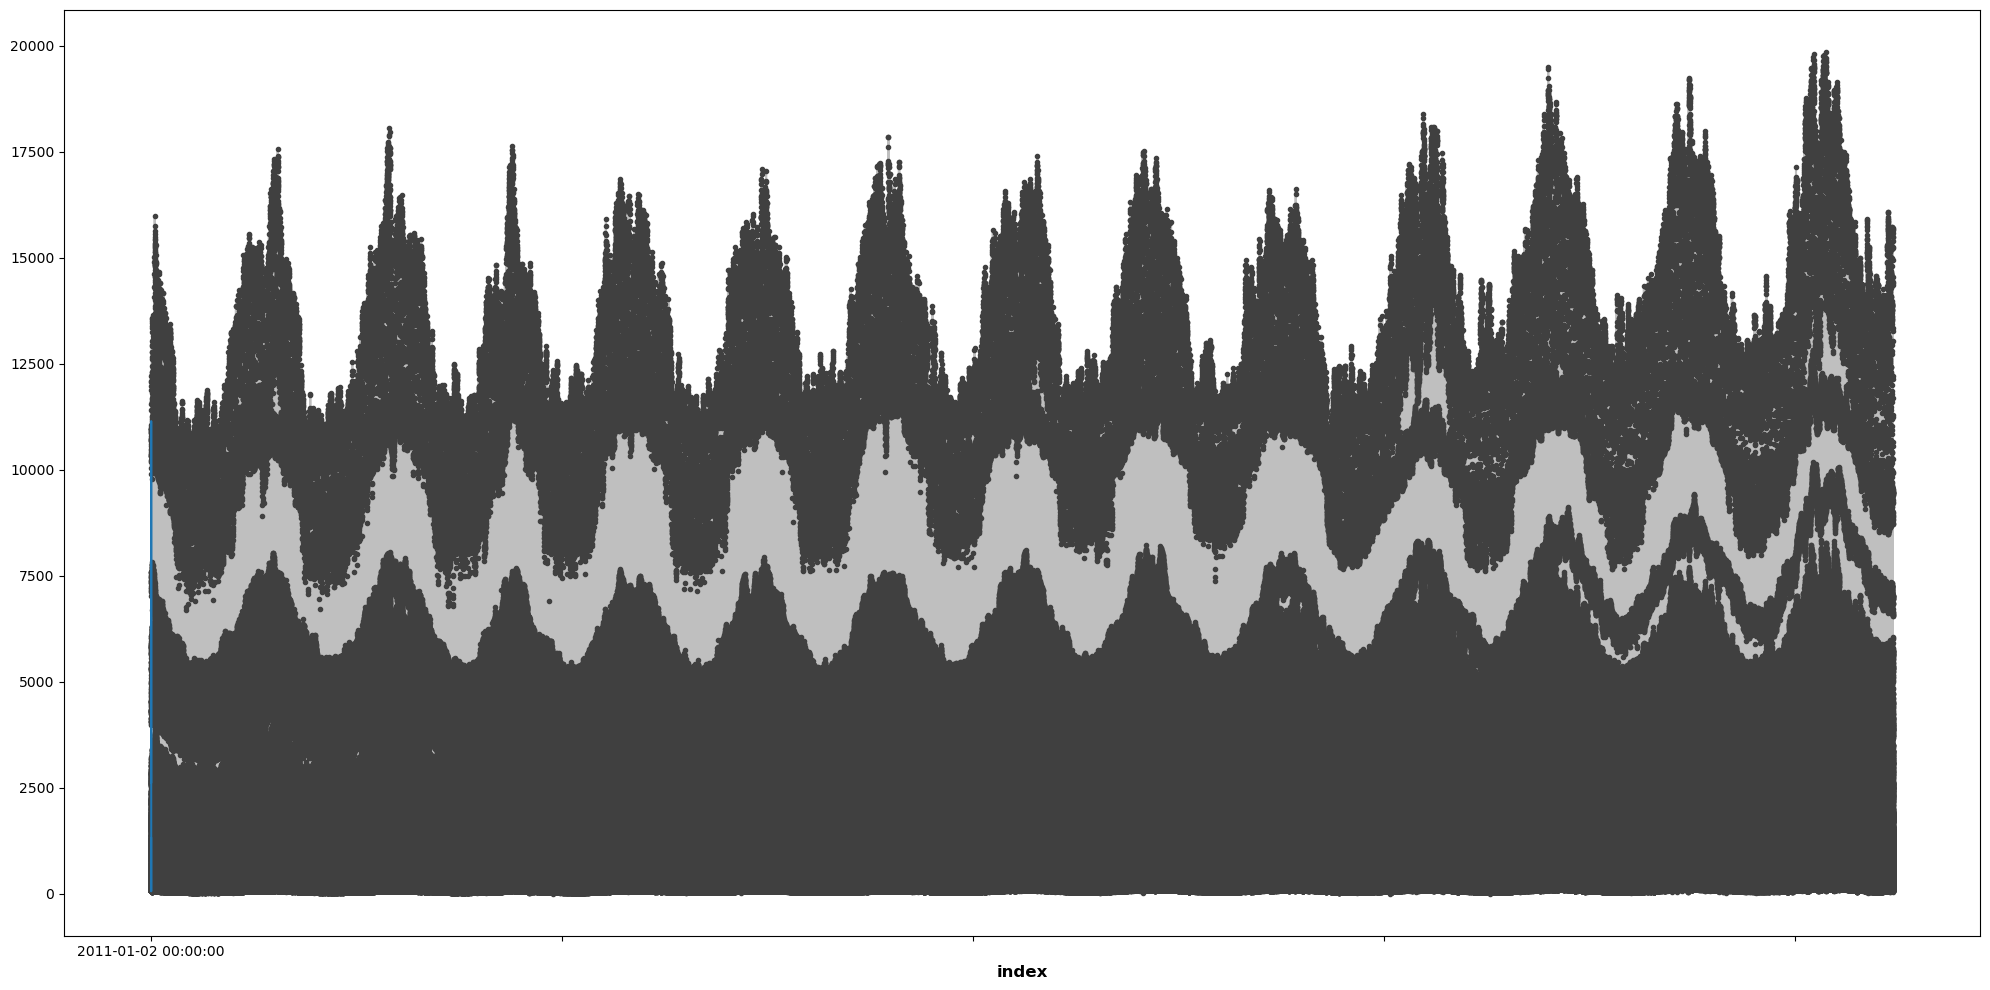

In [34]:
ax = y.plot(**plot_params)
ax = y_pred[:250].plot()

In [35]:
moving_average = df[df["Алтайский край"] == 1]["actual_consumption"][-85000:].rolling(
                                window=20000,       # 365-day window
                                center=True,      # puts the average at the center of the window
                                min_periods=10000,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)


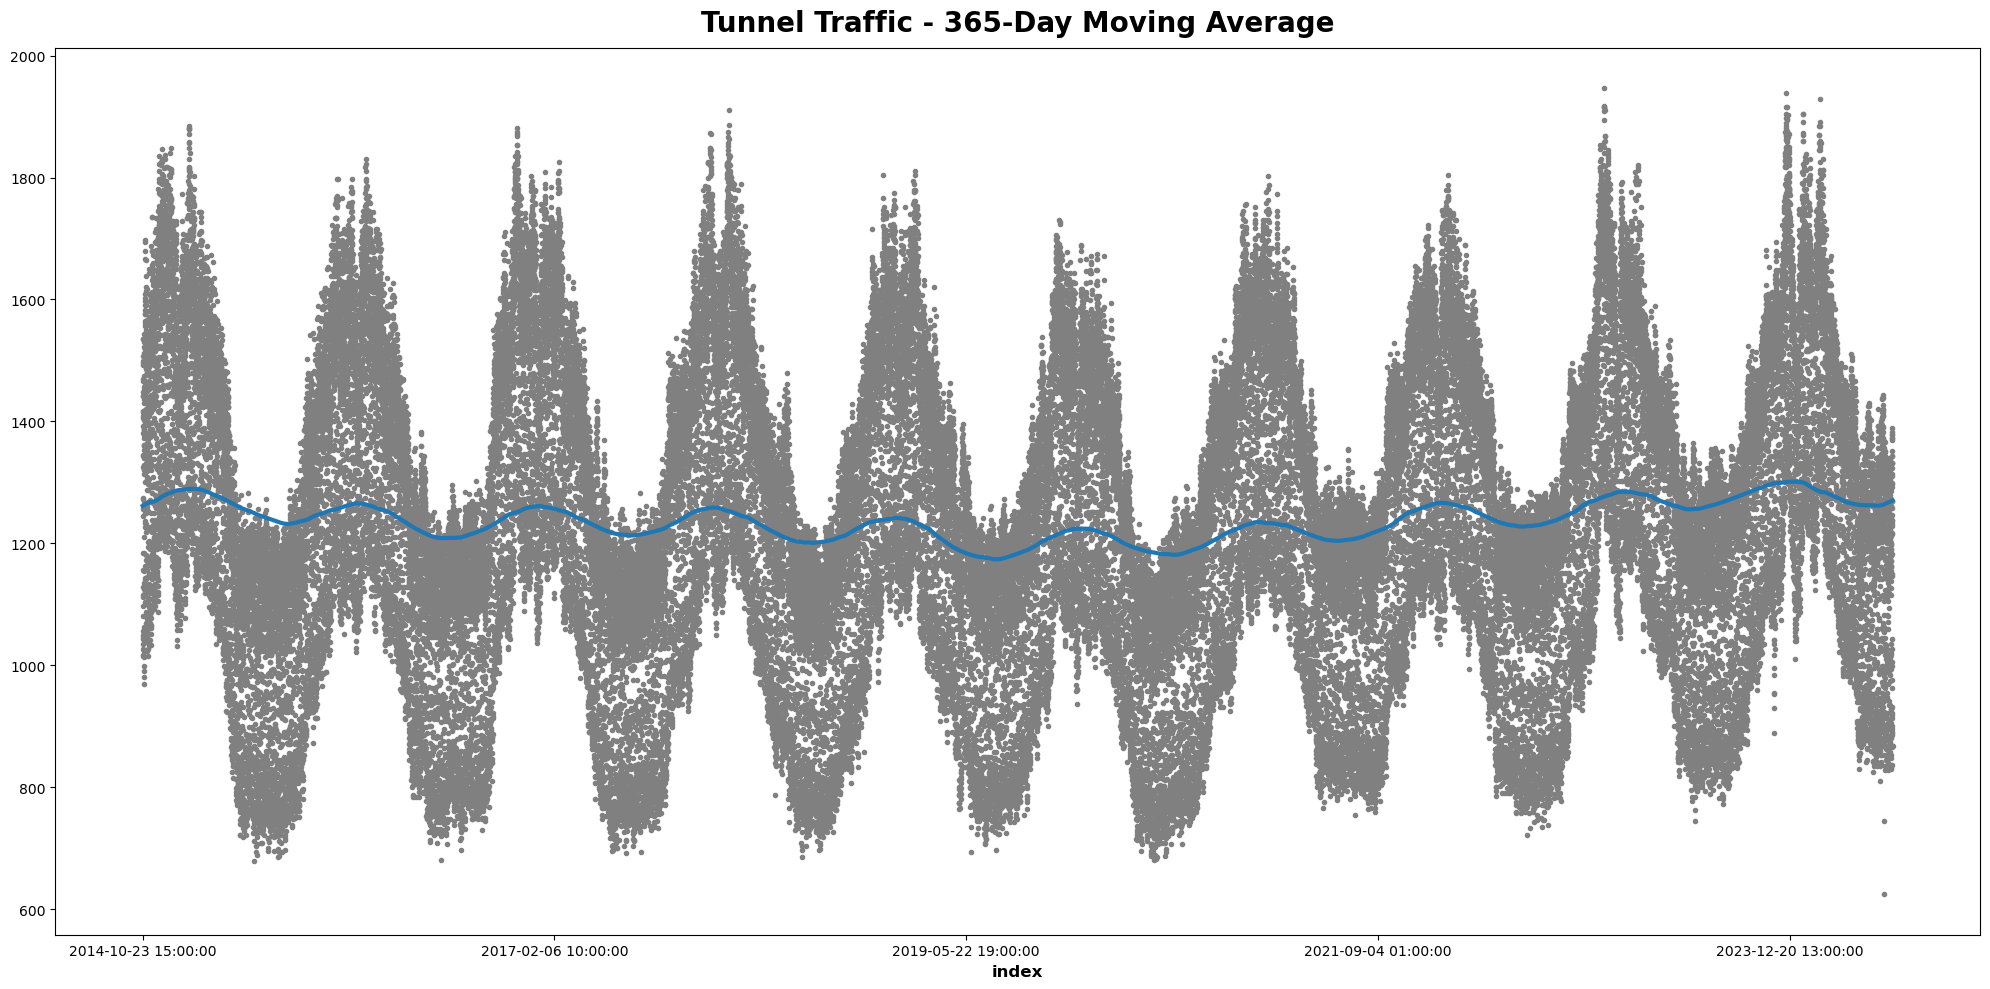

In [36]:
ax = df[df["Алтайский край"] == 1]["actual_consumption"][-85000:].plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Tunnel Traffic - 365-Day Moving Average", legend=False,
);

In [37]:
moving_average = df[df["Владимирская область"] == 1]["actual_consumption"][-85000:].rolling(
                                window=20000,       # 365-day window
                                center=True,      # puts the average at the center of the window
                                min_periods=10000,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)


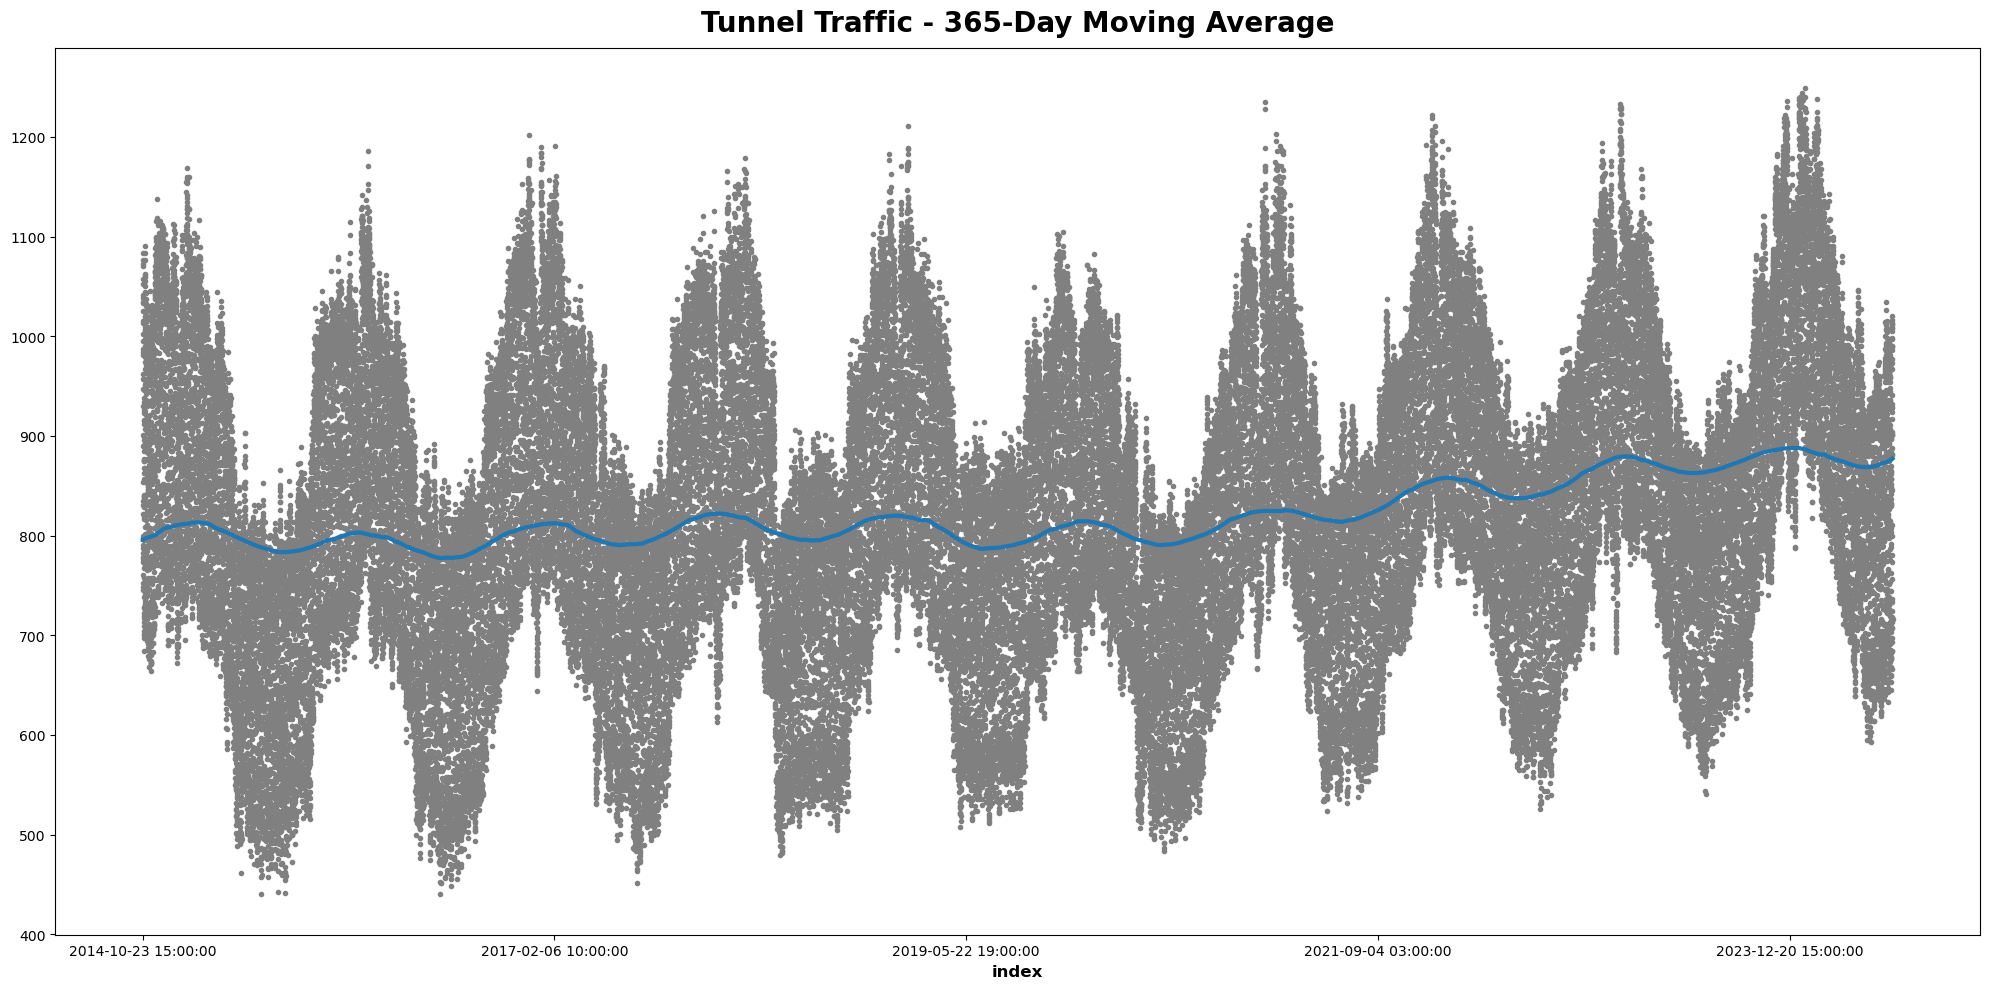

In [38]:
ax = df[df["Владимирская область"] == 1]["actual_consumption"][-85000:].plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Tunnel Traffic - 365-Day Moving Average", legend=False,
);

In [39]:
dp = DeterministicProcess(
    index=df.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.head()

,const,trend
index,,
2011-01-02 00:00:00,1.0,1.0
2011-01-02 00:00:00,1.0,2.0
2011-01-02 00:00:00,1.0,3.0
2011-01-02 00:00:00,1.0,4.0
2011-01-02 00:00:00,1.0,5.0


In [40]:
def fourier_features(index, freq, order):
    
    time = np.arange(len(index), dtype=np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    
    for i in range(1, order + 1):
        features.update({
            f"sin_{freq}_{i}": np.sin(i * k),
            f"cos_{freq}_{i}": np.cos(i * k),
        })
    
    return pd.DataFrame(features, index=index)

In [45]:
df.head(2)

,actual_consumption,datetime,dummie step,day_lag,Алтайский край,Амурская область,Архангельская область,Астраханская область,Белгородская область,Брянская область,...,Тульская область,Тюменская область,Удмуртская Республика,Ульяновская область,Центральный энергорайон Якутии,Челябинская область,Чеченская Республика,Чувашская Республика - Чувашия,Южно-Якутский энергорайон,Ярославская область
index,,,,,,,,,,,,,,,,,,,,,
2011-01-02 00:00:00,1206.0,2011-01-02,1704,1313.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-02 00:00:00,919.0,2011-01-02,1705,870.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Compute Fourier features to the 4th order (8 new features) for a
# series y with daily observations and annual seasonality:
#
fourier_features(df["actual_consumption"], freq=365.25, order=4)

,sin_365.25_1,cos_365.25_1,sin_365.25_2,cos_365.25_2,sin_365.25_3,cos_365.25_3,sin_365.25_4,cos_365.25_4
actual_consumption,,,,,,,,
1206.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
919.0,0.017202,0.999852,0.034398,0.999408,0.051584,0.998669,0.068755,0.997634
906.0,0.034398,0.999408,0.068755,0.997634,0.103031,0.994678,0.137185,0.990545
453.0,0.051584,0.998669,0.103031,0.994678,0.154204,0.988039,0.204966,0.978769
1734.0,0.068755,0.997634,0.137185,0.990545,0.204966,0.978769,0.271777,0.962360
...,...,...,...,...,...,...,...,...
3854.0,-0.972674,0.232174,-0.451660,-0.892190,0.752753,-0.658303,0.805933,0.592007
412.0,-0.968928,0.247343,-0.479315,-0.877643,0.731817,-0.681501,0.841335,0.540513
486.0,-0.964945,0.262452,-0.506503,-0.862238,0.710166,-0.704034,0.873453,0.486909


In [41]:
def seasonal_plot(X, y, period, freq, ax=None):
    
    if ax is None:
        _, ax = plt.subplots()
    
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    
    return ax

In [47]:
df.head()

,actual_consumption,datetime,dummie step,day_lag,Алтайский край,Амурская область,Архангельская область,Астраханская область,Белгородская область,Брянская область,...,Тульская область,Тюменская область,Удмуртская Республика,Ульяновская область,Центральный энергорайон Якутии,Челябинская область,Чеченская Республика,Чувашская Республика - Чувашия,Южно-Якутский энергорайон,Ярославская область
index,,,,,,,,,,,,,,,,,,,,,
2011-01-02 00:00:00,1206.0,2011-01-02,1704,1313.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-02 00:00:00,919.0,2011-01-02,1705,870.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-02 00:00:00,906.0,2011-01-02,1706,970.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-02 00:00:00,453.0,2011-01-02,1707,504.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-02 00:00:00,1734.0,2011-01-02,1708,1592.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
zxc = pd.read_parquet("../../prepare_data/prep_df.gzip")

In [49]:
zxc.head(1)

,actual_consumption,year,month,day_of_month,hour,day_of_week,day_of_year,week_of_year,quarter,holiday,...,Тульская область,Тюменская область,Удмуртская Республика,Ульяновская область,Центральный энергорайон Якутии,Челябинская область,Чеченская Республика,Чувашская Республика - Чувашия,Южно-Якутский энергорайон,Ярославская область
index,,,,,,,,,,,,,,,,,,,,,
2011-01-03 00:00:00,1230.0,2011,1,3,0,1,3,1,3,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
zxc = zxc[:100]

ValueError: Could not interpret value `dayofyear` for parameter `x`

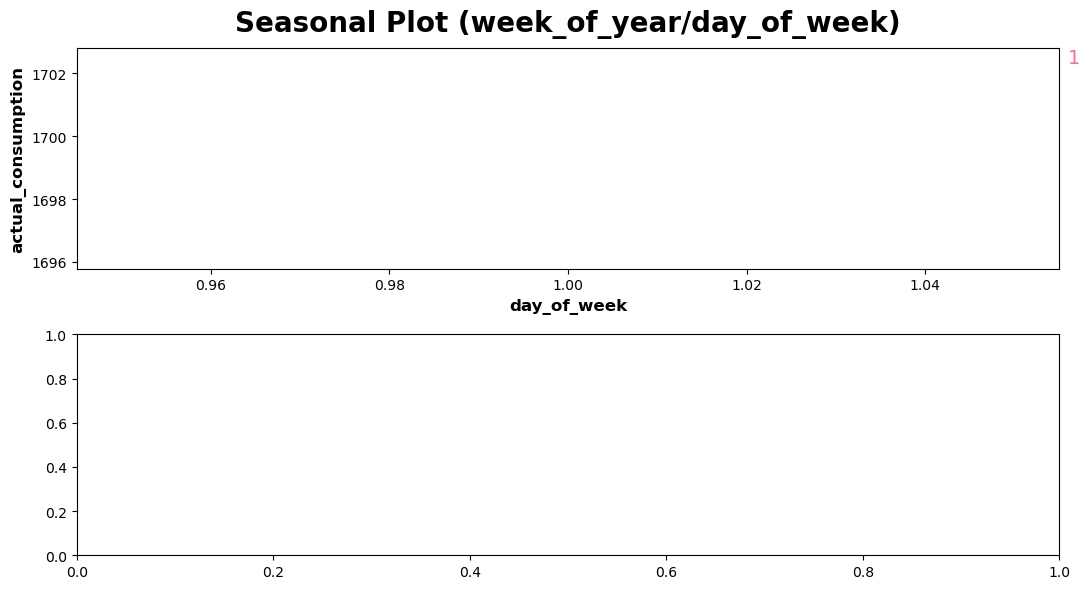

In [53]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(zxc, y="actual_consumption", period="week_of_year", freq="day_of_week", ax=ax0)
seasonal_plot(zxc, y="actual_consumption", period="year", freq="dayofyear", ax=ax1);

In [63]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1H")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

In [57]:
df.head(2)

,actual_consumption,datetime,dummie step,day_lag,Алтайский край,Амурская область,Архангельская область,Астраханская область,Белгородская область,Брянская область,...,Тульская область,Тюменская область,Удмуртская Республика,Ульяновская область,Центральный энергорайон Якутии,Челябинская область,Чеченская Республика,Чувашская Республика - Чувашия,Южно-Якутский энергорайон,Ярославская область
index,,,,,,,,,,,,,,,,,,,,,
2011-01-02 00:00:00,1206.0,2011-01-02,1704,1313.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-02 00:00:00,919.0,2011-01-02,1705,870.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
p = df[df["Алтайский край"] == 1].copy()
p["dummie step"] = range(p.shape[0])

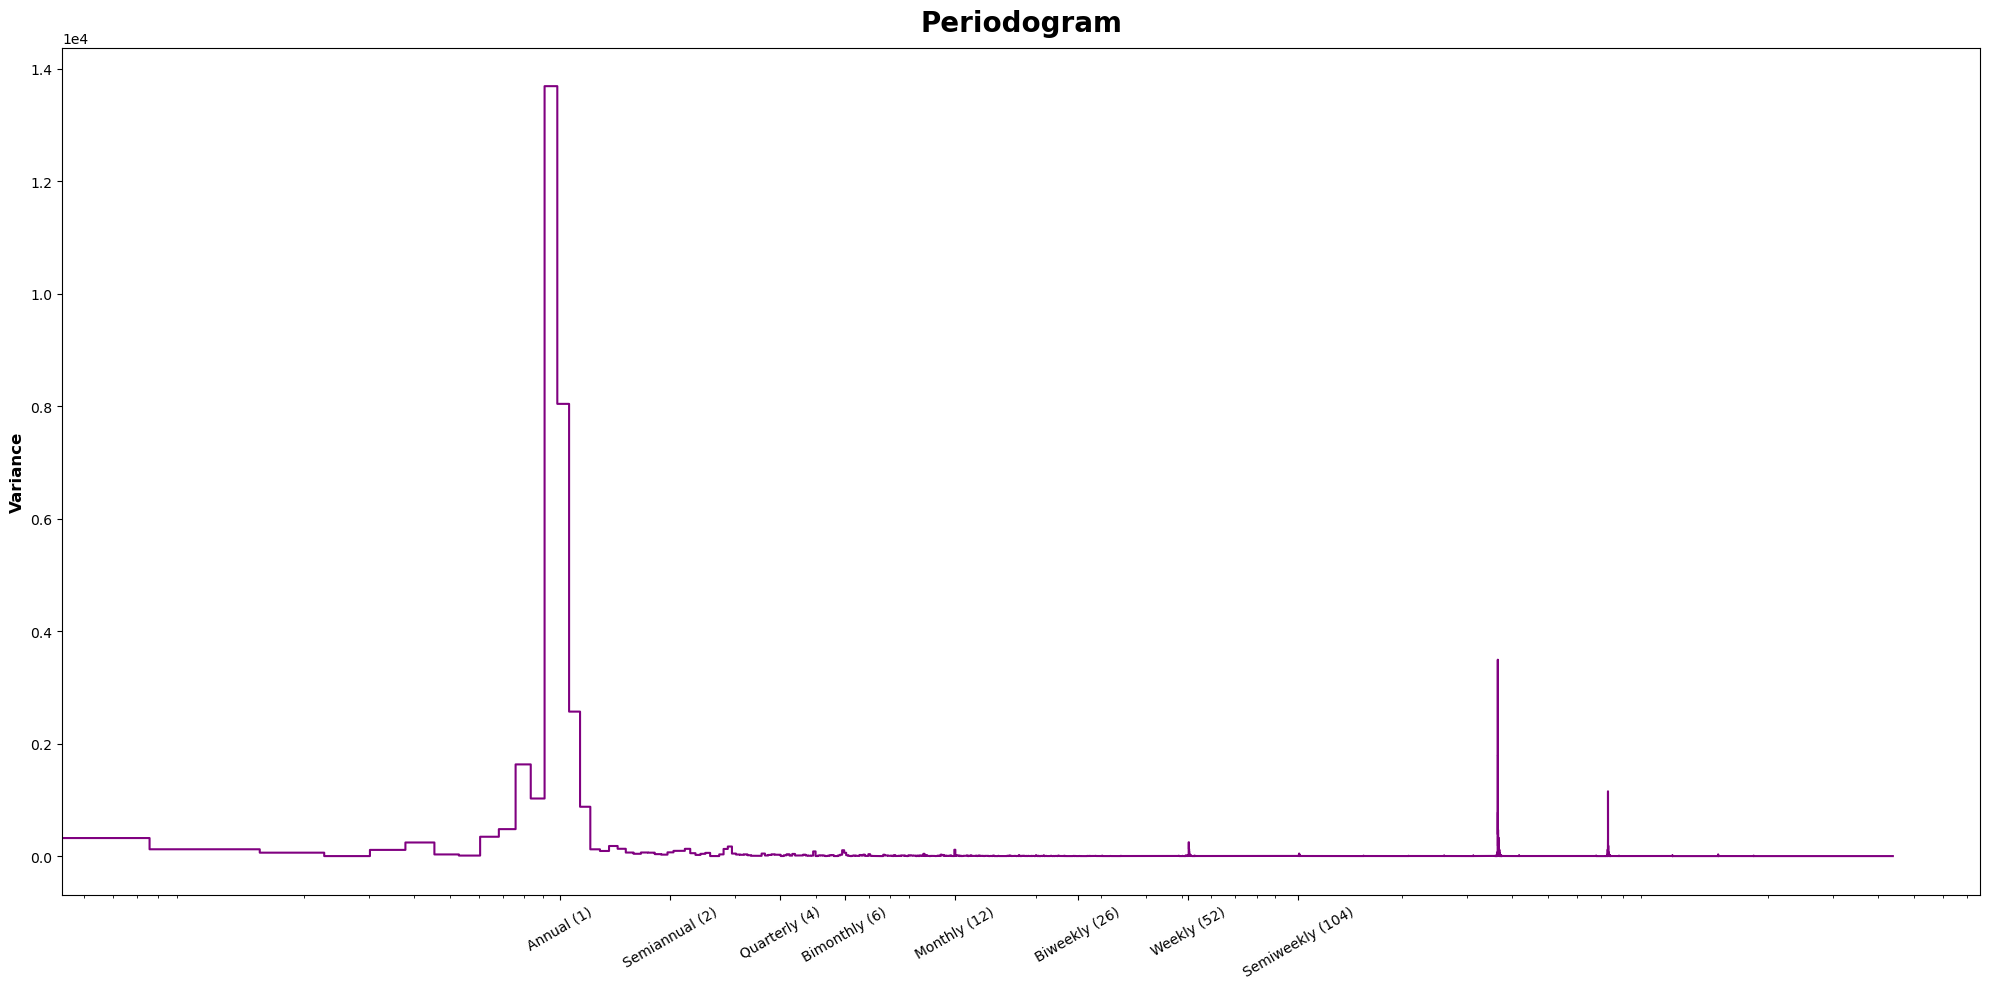

In [64]:


plot_periodogram(df[df["Алтайский край"] == 1].actual_consumption);

In [65]:
fourier = CalendarFourier(freq="A", order=10)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=df.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

df = dp.in_sample()  # create features for dates in tunnel.index

AssertionError: 